1. YOLOv8 모델 로드: 사전 학습된 YOLOv8 모델  call. <br>
2. 데이터셋 준비: 추가 학습에 필요한 새로운 데이터셋 준비<br>
3. 파인 튜닝: 기존 모델을 새로운 데이터에 맞게 추가 학습 <br>
4. 예측 수행: 학습된 모델을 사용, 새로운 이미지에 대한 객체 탐지 수행.<br>
5. 결과 저장: 예측 결과를 시각화, 이미지로 저장 <br><br>


 Roboflow : 객체 탐지, 이미지 분류, 이미지 세그멘테이션 등을 위한 데이터셋 관리 및 전처리 도구를 제공하는 서비스

In [ ]:
!pip install ultralytics

In [6]:
from ultralytics import YOLO

In [ ]:
!pip install roboflow  # Install the roboflow module

In [7]:
from roboflow import Roboflow

1. https://roboflow.com/ 회원가입 <br>
2. workspace 생성 <br>
3. project 생성 <br>
4. api_key copy

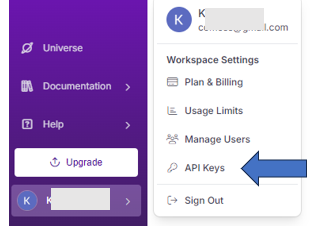

In [8]:
rf = Roboflow(api_key="lFjwGp3JU8Qi9yOmQtLE")
project = rf.workspace("kdtai3").project("kdt_ai3")



loading Roboflow workspace...
loading Roboflow project...


5. dataset(image) upload and processing

In [13]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="lFjwGp3JU8Qi9yOmQtLE")
# project = rf.workspace("kdtai3").project("kdt_ai3")
version = project.version(1)
dataset = version.download("yolov5")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to KDT_AI3-1 in yolov5pytorch:: 100%|██████████| 72/72 [00:00<00:00, 5077.17it/s]


In [10]:
# WS 이름 확인
import requests

api_key = "lFjwGp3JU8Qi9yOmQtLE"
response = requests.get(f"https://api.roboflow.com/?api_key={api_key}")
print(response.json())


{'welcome': 'Welcome to the Roboflow API.', 'instructions': 'You are successfully authenticated.', 'docs': 'https://docs.roboflow.com', 'workspace': 'kdtai3'}


In [11]:
# Prj 이름 확인
import requests

api_key = "lFjwGp3JU8Qi9yOmQtLE"
workspace = "kdtai3"

response = requests.get(f"https://api.roboflow.com/{workspace}?api_key={api_key}")
data = response.json()

# Check the structure of the response
print(data.keys())

# Access project information based on the actual response structure
# For example, if project information is under 'workspace' key:
if 'workspace' in data:
    for project in data['workspace']['projects']:
        print(project['name'])

dict_keys(['workspace'])
KDT_AI3


In [15]:
from pathlib import Path

In [20]:
rel_path = "/content/KDT_AI3-1/data.yaml"

In [22]:
full_path = Path(rel_path).resolve()

In [18]:
model = YOLO("yolov8n.pt")
# YOLOv8 모델 로드
# "yolov8n.pt"는 YOLOv8의 경량화된 버전(nano)의 사전 학습된 가중치 파일

100%|██████████| 6.25M/6.25M [00:00<00:00, 77.5MB/s]


In [23]:
model.train(data=full_path, epochs=20, imgsz=640, plots=True)

# data="data.yaml": 학습에 사용할 데이터셋 경로 지정
   # 학습 및 검증 데이터셋의 경로, 클래스 수, 클래스 이름 등
# imgsz=640: 학습 이미지의 크기 지정  640x640
# plots=True: 학습 중의 손실 함수 그래프 등 시각화


Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/KDT_AI3-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/KDT_AI3-1/train/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 460.26it/s]

train: New cache created: /content/KDT_AI3-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/KDT_AI3-1/valid/labels... 6 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6/6 [00:00<00:00, 2248.96it/s]

val: New cache created: /content/KDT_AI3-1/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G       1.22      2.945      1.541          8        640: 100%|██████████| 2/2 [00:30<00:00, 15.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all          6          8    0.00389      0.875     0.0855     0.0495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G     0.9834      2.623       1.34         11        640: 100%|██████████| 2/2 [00:23<00:00, 11.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          6          8    0.00444          1      0.199      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.307      2.867      1.684          8        640: 100%|██████████| 2/2 [00:20<00:00, 10.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all          6          8    0.00444          1      0.304      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G       1.12      2.546      1.426         14        640: 100%|██████████| 2/2 [00:19<00:00,  9.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]

                   all          6          8    0.00444          1      0.484      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.9134      2.041      1.328         24        640: 100%|██████████| 2/2 [00:19<00:00,  9.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]

                   all          6          8    0.00444          1      0.571      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.238      2.072      1.544         13        640: 100%|██████████| 2/2 [00:20<00:00, 10.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]

                   all          6          8    0.00444          1      0.635      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.065      1.645      1.375         18        640: 100%|██████████| 2/2 [00:19<00:00,  9.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.74s/it]

                   all          6          8    0.00444          1      0.705      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.9589      1.505      1.401         14        640: 100%|██████████| 2/2 [00:20<00:00, 10.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          6          8    0.00444          1      0.634      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.113      1.593      1.401         13        640: 100%|██████████| 2/2 [00:19<00:00,  9.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all          6          8    0.00444          1      0.682      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.065      1.359       1.36         16        640: 100%|██████████| 2/2 [00:19<00:00,  9.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all          6          8    0.00444          1      0.681      0.394


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.8773      2.261      1.455          7        640: 100%|██████████| 2/2 [00:20<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]

                   all          6          8    0.00444          1       0.67      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.111      2.512       1.75          6        640: 100%|██████████| 2/2 [00:19<00:00,  9.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]

                   all          6          8    0.00444          1      0.599      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G          1      2.119      1.416          8        640: 100%|██████████| 2/2 [00:20<00:00, 10.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all          6          8    0.00444          1      0.696      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.8458      1.775      1.274          7        640: 100%|██████████| 2/2 [00:19<00:00,  9.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all          6          8    0.00444          1      0.766      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.7396      1.732       1.23          6        640: 100%|██████████| 2/2 [00:21<00:00, 10.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.77s/it]

                   all          6          8    0.00444          1      0.852       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.7634      1.613      1.249          7        640: 100%|██████████| 2/2 [00:19<00:00,  9.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          6          8    0.00444          1      0.743       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.8891      1.704      1.373          8        640: 100%|██████████| 2/2 [00:19<00:00,  9.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all          6          8    0.00444          1      0.701      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.6307        1.6      1.135          8        640: 100%|██████████| 2/2 [00:19<00:00,  9.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all          6          8    0.00444          1      0.751      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      0.811      1.691      1.295          6        640: 100%|██████████| 2/2 [00:19<00:00,  9.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.85s/it]

                   all          6          8    0.00444          1      0.756      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.7808      1.714      1.226          6        640: 100%|██████████| 2/2 [00:20<00:00, 10.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all          6          8    0.00444          1      0.792      0.394



20 epochs completed in 0.133 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


                   all          6          8    0.00444          1       0.79      0.397
Speed: 3.4ms preprocess, 262.7ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b08db33c9a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [24]:
!yolo task=detect mode=predict model=runs/detect/train22/weights/best.pt conf=0.1 source=Ferret_test-2/test/images save=True


# !yolo 셀 스크립트에서 YOLO CLI(Command Line Interface)를 호출 Colab에서 셀 내에서 명령어를 실행할 때 사용
# task=detect
   #  task=detect는 수행할 작업(task) 유형 지정
   #  객체 탐지(Object Detection) 작업 수행

# mode=predict

# model=runs/detect/train22/weights/best.pt 예측에 사용할 모델 경로 지정
  # .....pt 학습된 모델 가중치가 저장된 파일의 경로

# conf=0.1 객체 탐지 시 사용할 신뢰도 임계값(confidence threshold) 설정

# save=True  예측 결과 저장 여부
  # True 모델이 탐지한 결과를 시각화한 이미지가 지정된 폴더에 저장
  #  탐지된 객체에 대한 경계 상자(bounding box)와 클래스 정보가 포함된 이미지 파일들 생성


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 807, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 142, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 294, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 855, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 781, in torch_safe_load
    ckpt = torch.load(fi

In [25]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')  # load a custom model

In [26]:
# Predict with the model
results = model.predict('/content/ferret-close-up.jpg', conf=0.1)  # predict on an image

# conf=0.1: 신뢰도(confidence) 임계값 설정. 예측된 객체가 이 임계값 이상일 때만 결과에 포함
# results 객체에 예측 결과 저장 ... 경계 상자, 세그멘테이션 마스크, 키포인트 등




image 1/1 /content/ferret-close-up.jpg: 416x640 (no detections), 175.6ms
Speed: 4.8ms preprocess, 175.6ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


In [27]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'KDT_AI3'}
 obb: None
 orig_img: array([[[ 94, 140, 194],
         [ 94, 140, 194],
         [ 94, 140, 194],
         ...,
         [100, 138, 192],
         [ 99, 137, 191],
         [ 99, 137, 191]],
 
        [[ 94, 140, 194],
         [ 94, 140, 194],
         [ 94, 140, 194],
         ...,
         [100, 138, 192],
         [ 99, 137, 191],
         [ 99, 137, 191]],
 
        [[ 94, 140, 194],
         [ 94, 140, 194],
         [ 94, 140, 194],
         ...,
         [100, 138, 192],
         [ 99, 137, 191],
         [ 99, 137, 191]],
 
        ...,
 
        [[166, 181, 197],
         [165, 179, 197],
         [163, 177, 195],
         ...,
         [ 98, 133, 183],
         [ 97, 132, 182],
         [ 96, 131, 181]],
 
        [[165, 180, 196],
         [164, 178, 196],
         [163, 177, 195],
         ...,
         [ 98, 13

In [28]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs

In [29]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (633, 1000)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))

In [30]:
from PIL import Image

In [31]:
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image